# Case study Figures
Figures 9 & 3

## 1. Import Libraries

In [21]:
from datetime import datetime
from itertools import product
from pathlib import Path
from typing import Any
import seaborn as sns 
import joblib
# import keras
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import matplotlib.dates as mdates
import numpy as np
import pandas as pd
from matplotlib.colors import LinearSegmentedColormap
# import plotly.express as px
# import plotly.graph_objects as go
# import streamlit as st
# import tensorflow as tf
import xarray as xr
from sklearn import metrics
# from sklearn.ensemble import RandomForestClassifier

## 2. Get your Constants

In [22]:
PHASE_MAP = {
    0: "clear",
    1: "liquid",
    2: "ice",
    3: "mixed",
    4: "drizzle",
    5: "liq_driz",
    6: "rain",
    7: "snow",
    8: "unknown",
}

# Updated PHASE_MAP to exclude 'clear' and 'unknown'
PHASE_MAP_small = {
    1: "liquid",
    2: "ice",
    3: "mixed",
    4: "drizzle",
    5: "liq_driz",
    6: "rain",
    7: "snow"
}

In [23]:
_cblind = sns.color_palette("colorblind")

custom_colors = [
    "white",  # clear (white)
    _cblind[2],  # liquid (dark purple from viridis)
    _cblind[0],  # ice (blue from viridis)
    _cblind[3],  # mixed (greenish-blue from viridis)
    _cblind[9],  # drizzle (light green from viridis)
    _cblind[6],  # liq_driz (yellow from viridis)
    _cblind[8],  # rain (brighter yellow)
    _cblind[5],  # snow (orange-yellow)
    "black",  # unknown (grey)
]

## 3. Figure Code called as functions

In [24]:
def create_small_colorbar(axs):
    # Define the custom colors for each phase
    custom_colors = [
        _cblind[2],  # liquid (dark purple from viridis)
        _cblind[0],  # ice (blue from viridis)
        _cblind[3],  # mixed (greenish-blue from viridis)
        _cblind[9],  # drizzle (light green from viridis)
        _cblind[6],  # liq_driz (yellow from viridis)
        _cblind[8],  # rain (brighter yellow)
        _cblind[5],  # snow (orange-yellow)
    ]

    # Create a colormap with distinct colors for each integer value
    cmap = mcolors.ListedColormap(custom_colors)

    # Create a norm for the colorbar to map integer values to the colormap
    bounds = np.arange(1, 9)  # Values 1 to 7 (corresponding to the phases)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    # Define the phase labels
    PHASE_MAP_small = {
        1: "liquid",
        2: "ice",
        3: "mixed",
        4: "drizzle",
        5: "liq_driz",
        6: "rain",
        7: "snow"
    }

    

    # Create the colorbar using the colormap, norm, and set the ticks and labels
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=axs, orientation='horizontal', ticks=np.arange(1, 8))
    cbar.set_label('Cloud Phases')
    cbar.set_ticks(np.arange(1, 8)+.5)  # Set ticks for each phase
    cbar.ax.set_xticklabels([PHASE_MAP_small[i] for i in range(1, 8)], rotation=45)  # Set custom labels

    
# Create a figure and axis to display the colorbar
# fig, ax = plt.subplots(figsize=(6,2))
# create_small_colorbar(ax)
# ax.axis('off')
# plt.show()


In [25]:
def create_confidence_colorbar(axs):

    # Define the colormap (Viridis)
    cmap = plt.cm.viridis

    # Create a scalar mappable object, which is necessary for colorbars
    norm = mcolors.Normalize(vmin=0, vmax=100)

    # Use the `fig.colorbar` function to create the colorbar
    cb = fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap), ax=axs, orientation = 'horizontal')

    # Set the label for the colorbar
    cb.set_label('Confidence Score [%]')

# Create a figure and axis to display the colorbar
# fig, ax = plt.subplots(figsize=(6,2))
# create_confidence_colorbar(ax)
# ax.axis('off')
# plt.show()

In [26]:
def create_colorbar(axs):
    # Define the custom colors for each phase
    custom_colors = [
        "white",  # clear (white)
        _cblind[2],  # liquid (dark purple from viridis)
        _cblind[0],  # ice (blue from viridis)
        _cblind[3],  # mixed (greenish-blue from viridis)
        _cblind[9],  # drizzle (light green from viridis)
        _cblind[6],  # liq_driz (yellow from viridis)
        _cblind[8],  # rain (brighter yellow)
        _cblind[5],  # snow (orange-yellow)
        "black",  # unknown (grey)
    ]

    # Create a colormap with distinct colors for each integer value
    cmap = mcolors.ListedColormap(custom_colors)

    # Create a norm for the colorbar to map integer values to the colormap
    bounds = np.arange(0,10)  # Values 1 to 7 (corresponding to the phases)
    norm = mcolors.BoundaryNorm(bounds, cmap.N)

    PHASE_MAP = {
        0: "clear",
        1: "liquid",
        2: "ice",
        3: "mixed",
        4: "drizzle",
        5: "liq_driz",
        6: "rain",
        7: "snow",
        8: "unknown",
    }

    

    # Create the colorbar using the colormap, norm, and set the ticks and labels
    cbar = fig.colorbar(plt.cm.ScalarMappable(cmap=cmap, norm=norm), ax=axs, orientation='horizontal', ticks=np.arange(0, 9))
    cbar.set_label('Cloud Phases')
    cbar.set_ticks(np.arange(0, 9)+.5)  # Set ticks for each phase
    cbar.ax.set_xticklabels([PHASE_MAP[i] for i in range(0, 9)], rotation=45)  # Set custom labels

    
# Create a figure and axis to display the colorbar
# fig, ax = plt.subplots(figsize=(6,2))
# create_colorbar(ax)
# ax.axis('off')
# plt.show()


In [27]:
def create_timeseries(variable_name, axs, ds, PHASE_MAP, custom_colors):
    """
    Creates a timeseries plot along with a confusion matrix and custom colorbar.
    
    Parameters:
    axs (matplotlib.axes.Axes): The axis to plot the figure on.
    ds (xarray.Dataset): The dataset containing the timeseries data.
    PHASE_MAP (dict): Dictionary mapping the phase labels to categories.
    custom_colors (list): Custom colors to apply to different phases in the timeseries.
    """
    # Extract phase values and labels
    phase_values = list(PHASE_MAP.keys())
    phase_labels = list(PHASE_MAP.values())

    # Define the integer range for levels
    min_val = int(ds[variable_name].min().values)
    max_val = int(ds[variable_name].max().values)

    # Create a colormap with distinct colors for each integer value
    cmap = mcolors.ListedColormap(custom_colors)

    # Plot the timeseries with the colormap
    plot = ds[variable_name].transpose().plot(ax=axs, cmap=cmap, 
                                                    levels=np.arange(len(phase_values)+1), 
                                                    add_colorbar=False)

    # Add a colorbar with custom ticks and labels
    # cbar = plt.colorbar(plot, ax=axs, ticks=phase_values)
    # cbar.set_ticklabels(phase_labels)  # Set phase names as labels for each tick
    # cbar.ax.tick_params(labelsize=8)

    # Add labels and title for the timeseries plot
    axs.set_xlabel('', fontsize=12)
    

    if variable_name == 'cloud_phase_mplgr':
        axs.set_title('Ground Truth VAP', fontsize=16)
        axs.set_ylabel('\n Height [km]', fontsize=12)
    if 'rf' in variable_name:
        axs.set_title('RF', fontsize=16)
        axs.set_ylabel('', fontsize=12)
    if 'cnn' in variable_name:
        axs.set_title('CNN', fontsize=16)
        axs.set_ylabel('', fontsize=12)
    if 'cnn_dropout' in variable_name:
        axs.set_title('CNN with 2D \n Spatial Dropouts', fontsize=16)
        axs.set_ylabel('', fontsize=12)
    if 'mlp' in variable_name:
        axs.set_title('MLP', fontsize=16)
        axs.set_ylabel('', fontsize=12)
    axs.set_ylim([0,8])
    axs.tick_params(axis='x', rotation=45, labelsize=10)
    axs.tick_params(axis='y', labelsize=10)
    axs.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
# Example usage:
# fig, axs = plt.subplots(figsize=(10, 6))
# create_timeseries('cnn_20240429_213223',axs, ds, PHASE_MAP, custom_colors)
# plt.show()

In [28]:
def create_timeseries_no_unknown(variable_name, axs, ds, PHASE_MAP, custom_colors):
    """
    Creates a timeseries plot along with a confusion matrix and custom colorbar.
    
    Parameters:
    axs (matplotlib.axes.Axes): The axis to plot the figure on.
    ds (xarray.Dataset): The dataset containing the timeseries data.
    PHASE_MAP (dict): Dictionary mapping the phase labels to categories.
    custom_colors (list): Custom colors to apply to different phases in the timeseries.
    """
    # Extract phase values and labels
    phase_values = list(PHASE_MAP.keys())
    phase_labels = list(PHASE_MAP.values())

    # Define the integer range for levels
    min_val = int(ds[variable_name].min().values)
    max_val = int(ds[variable_name].max().values)

    # Create a colormap with distinct colors for each integer value
    cmap = mcolors.ListedColormap(custom_colors)

    # Plot the timeseries with the colormap
    plot = ds[variable_name].transpose().plot(ax=axs, cmap=cmap, 
                                                    levels=np.arange(len(phase_values)+1), 
                                                    add_colorbar=False)

    # Add labels and title for the timeseries plot
    axs.set_xlabel('', fontsize=12)
    

    if variable_name == 'cloud_phase_mplgr':
        axs.set_title('Ground Truth VAP', fontsize=16)
        axs.set_ylabel('\n Height [km]', fontsize=12)
        
    if 'rf' in variable_name:
        axs.set_title('RF', fontsize=16)
        axs.set_ylabel('', fontsize=12)
        #axs.tick_params(axis='y', labelsize=0)
    if 'cnn' in variable_name:
        axs.set_title('CNN', fontsize=16)
        axs.set_ylabel('', fontsize=12)
        #axs.tick_params(axis='y', labelsize=0)
    if 'cnn_dropout' in variable_name:
        axs.set_title('CNN-ICD', fontsize=16)
        axs.set_ylabel('', fontsize=12)
        #axs.tick_params(axis='y', labelsize=0)
    if 'mlp' in variable_name:
        axs.set_title('MLP', fontsize=16)
        axs.set_ylabel('', fontsize=12)
        #axs.tick_params(axis='y', labelsize=0)
    axs.set_ylim([0,8])
    axs.tick_params(axis='x', rotation=45, labelsize=10)
    axs.tick_params(axis='y', labelsize=10)
    axs.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
# Example usage:
# fig, axs = plt.subplots(figsize=(10, 6))
# create_timeseries_no_unknown('cloud_phase_mplgr',axs, ds, PHASE_MAP, custom_colors)
# plt.show()

In [29]:
def create_confidence_timeseries(variable_name, axs, ds):

    # Create a new xarray DataArray using the max_phase_values
    confidence_da = xr.DataArray(
        np.max(ds[variable_name].values, axis=2) * 100,  # Data
        coords=[ds.time.values, ds.height.values],  # Coordinates (time, height)
        dims=["time", "height"],  # Dimension names
        name="Confidence Score [%]",  # Optional: name of the DataArray
    )

    plot = confidence_da.T.plot(ax=axs, vmin=0, vmax=100, add_colorbar=False)

    # Adjust font sizes for title, labels, ticks, and colorbar
    #if variable_name == 'cnn_20240429_213223_confidence':
    axs.set_title('Confidence Score [%]', fontsize=14)  # Title font size
    axs.set_xlabel('', fontsize=14)  # X-axis label font size
    axs.set_ylabel('Height [km]', fontsize=12)  # Y-axis label font size
    axs.set_ylim([0,8])
    # Adjust tick label sizes
    axs.tick_params(axis='both', labelsize=12)  # Axis tick labels font size


    axs.tick_params(axis='x', rotation=45, labelsize=10)
    axs.tick_params(axis='y', labelsize=10)
    axs.xaxis.set_major_formatter(mdates.DateFormatter("%H:%M"))
    masked_flag = np.ma.masked_where(ds.cloud_flag.T == 1, ds.cloud_flag.T)

    # Plot using contourf for areas where the flag is 0 (masked areas are not filled)
    plot_overlay = axs.contourf(ds.time, ds.height, masked_flag, levels=[0, 0.5], colors=['white'], extend='both')


In [30]:
def create_matrix(variable_name, axs, ds, PHASE_MAP):
    """
    Create a confusion matrix with accuracy and IoU metrics.
    
    Parameters:
    axs (matplotlib.axes.Axes): The axis to plot the figure on.
    ds (xarray.Dataset): The dataset containing the true and predicted labels.
    PHASE_MAP (dict): Dictionary mapping the phase labels to categories.
    """
    # Convert xarray data to pandas series
    y_true = ds["cloud_phase_mplgr"].to_series()
    y_pred = ds[variable_name].to_series()

    # Remap predictions and ground truth to categorical labels
    y_pred = y_pred.reset_index(drop=True).map(PHASE_MAP).astype("category")
    y_true = y_true.reset_index(drop=True).map(PHASE_MAP).astype("category")
    
    # Filter out "unknown" and "clear" categories before comparing
    valid_labels = list(PHASE_MAP.values())  # Only include labels we want to keep
    valid_idx = y_true.isin(valid_labels) & y_pred.isin(valid_labels)
    
    # Apply the filter to both y_true and y_pred to ensure the same shape
    y_true = y_true[valid_idx]
    y_pred = y_pred[valid_idx]

    # Check if lengths match after filtering
    if len(y_true) != len(y_pred):
        raise ValueError(f"After filtering, y_true and y_pred have different lengths: {len(y_true)} vs {len(y_pred)}")
    
    # Calculate accuracy and mean IoU
    accuracy = metrics.accuracy_score(y_true=y_true, y_pred=y_pred)
    iou = np.mean(metrics.jaccard_score(y_true=y_true, y_pred=y_pred, average=None))

    # Set font size for the plot
    font = {'size': 5}
    plt.rc('font', **font)


    # Create a custom colormap that starts with white and then uses viridis colors
    viridis = plt.cm.Blues
    colors = viridis(np.linspace(0, 1, 256))  # Get 256 colors from viridis

    # Set the first color (zero) to white
    colors[0] = [1, 1, 1, 1]  # RGBA for white: [1, 1, 1, 1]

    # Create the custom colormap
    custom_cmap = LinearSegmentedColormap.from_list("viridis_white", colors)
    #custom_cmap = LinearSegmentedColormap.from_list("Blues")
    # Generate and plot the confusion matrix
    cm_display = metrics.ConfusionMatrixDisplay.from_predictions(
        y_true,
        y_pred,
        labels=valid_labels,
        include_values = False,
        #values_format = "float" ,
        ax=axs,
        colorbar=False,
        cmap = custom_cmap,
        normalize="true"
    )

    #####################################
    # Access the confusion matrix values
    cm_values = cm_display.confusion_matrix

    # Annotate each cell in the confusion matrix
    for i in range(len(valid_labels)):
        for j in range(len(valid_labels)):
            value = cm_values[i, j]

            font_color = 'white' if value < 0.01 else 'black'
            
            # Add a background color to the text
            axs.text(
                j, i, f"{value:.2f}",
                ha='center', va='center', 
                color=font_color, fontsize=7,
                bbox=dict(facecolor=(1, 1, 1, 0.5) if font_color == 'white' else (1, 1, 1, 0.5), 
                          edgecolor='none', 
                          boxstyle='round,pad=0.1')  # Background with rounded corners and padding
            )

    #######################################

    # Set title and labels for the plot
    # axs.set_title(f"Accuracy={100*accuracy:.3f}%, Mean IoU={iou:.3f}", fontsize=10)
    print(f"Accuracy={100*accuracy:.3f}%, Mean IoU={iou:.3f}")
    axs.set_ylabel("Ground Truth", fontsize=12)
    #if 'rf' in variable_name:
    axs.set_xlabel("Model Classification", fontsize=12)
    #else:
    #    axs.set_xlabel("")

    # Rotate x-tick labels and set fontsize using tick_params
    axs.tick_params(axis='x', rotation=45, labelsize=7)
    axs.tick_params(axis='y', labelsize=7)

# Example usage:
# fig, axs = plt.subplots(figsize=(3,3))
# create_matrix('cnn_20240429_213223', axs, ds, PHASE_MAP)
# plt.show()  



In [31]:
def create_histogram(variable_name, axs, ds, PHASE_MAP, custom_colors):
    """
    Creates a histogram of CNN phase data, excluding clear pixels (phase 0).
    
    Parameters:
    axs (matplotlib.axes.Axes): The axis to plot the histogram on.
    ds (xarray.Dataset): The dataset containing the CNN phase data.
    PHASE_MAP (dict): Dictionary mapping phase integers to phase names.
    custom_colors (list): Custom colors to apply to different phases in the histogram.
    """
    # Extract the data from the DataArray
    data = ds[variable_name].values.flatten()

    # Mask out the "clear" pixels (corresponding to phase 0)
    non_clear_data = data[data != 0]

    # Create the histogram data for non-clear phases
    bins = np.arange(0.5, len(PHASE_MAP), 1)  # Exclude bin for 'clear'
    hist, bin_edges = np.histogram(non_clear_data, bins=bins)

    # Convert frequency counts to percentages (ignoring 'clear')
    total_count = hist.sum()
    percentages = (hist / total_count) * 100

    # Plot the histogram with custom colors and percentage values (excluding 'clear')
    axs.bar(
        range(1, len(PHASE_MAP)),  # Phases 1 and beyond (excluding clear)
        percentages,
        color=custom_colors[1:],  # Exclude the color for 'clear'
        tick_label=list(PHASE_MAP.values())[1:]  # Exclude 'clear' from tick labels
    #    tick_label = ['','','','','','','','']
    )

    # Set limits for the percentage axis (0 to 100)
    axs.set_ylim(0, 100)
    
    # Add labels and title
    # axs.set_ylabel('Phase Classification', fontsize=12)
    # if 'rf' in variable_name:
    axs.set_ylabel('\n Percentage (%)', fontsize=12)
    # if variable_name == 'cloud_phase_mplgr':
    axs.set_title('Phase Class Histogram', fontsize=14)
    axs.tick_params(axis='x', labelsize=8)
    axs.tick_params(axis='y', labelsize=10)
    axs.tick_params(axis='y')#, labelleft=False)# left=False
    axs.tick_params(axis='x', rotation=45)
    axs.grid(axis='y')


# Example usage:
# fig, axs = plt.subplots(figsize=(8, 6))
# create_histogram('cnn_20240429_213223',axs, ds, PHASE_MAP, custom_colors)
# plt.show()


In [32]:
def create_histogram_no_unknown(variable_name, axs, ds, PHASE_MAP, custom_colors):
    """
    Creates a histogram of CNN phase data, excluding clear pixels (phase 0).
    
    Parameters:
    axs (matplotlib.axes.Axes): The axis to plot the histogram on.
    ds (xarray.Dataset): The dataset containing the CNN phase data.
    PHASE_MAP (dict): Dictionary mapping phase integers to phase names.
    custom_colors (list): Custom colors to apply to different phases in the histogram.
    """
    # Extract the data from the DataArray
    data = ds[variable_name].values.flatten()

    # Mask out the "clear" pixels (corresponding to phase 0)
    non_clear_data = data[data != 0] 
    # Mask out the "unknown" pixels too (corresponding to phase 8)
    non_unknown_data = non_clear_data[non_clear_data != 8] 

    # Create the histogram data for non-clear phases
    bins = np.arange(0.5, len(PHASE_MAP)-1, 1)  # Exclude bin for 'clear' and 'unknown'
    hist, bin_edges = np.histogram(non_unknown_data, bins=bins)

    # Convert frequency counts to percentages (ignoring 'clear')
    total_count = hist.sum()
    percentages = (hist / total_count) * 100

    # Plot the histogram with custom colors and percentage values (excluding 'clear')
    axs.bar(
        range(1, len(PHASE_MAP)-1),  # Phases 1 and beyond (excluding clear)
        percentages,
        color=custom_colors[1:-1],  # Exclude the color for 'clear'
        tick_label=list(PHASE_MAP.values())[1:-1]  # Exclude 'clear' from tick labels
    #    tick_label = ['','','','','','','','']
    )

    # Set limits for the percentage axis (0 to 100)
    axs.set_ylim(0, 100)
    
    # Add labels and title
    # axs.set_ylabel('Phase Classification', fontsize=12)
    # if 'rf' in variable_name:
    axs.set_ylabel('\n Percentage (%)', fontsize=12)
    # if variable_name == 'cloud_phase_mplgr':
    axs.set_title('Phase Class Histogram', fontsize=14)
    axs.tick_params(axis='x', labelsize=8)
    axs.tick_params(axis='y', labelsize=10)
    axs.tick_params(axis='y')#, labelleft=False)# left=False
    axs.tick_params(axis='x', rotation=45)
    axs.grid(axis='y')


# Example usage:
# fig, axs = plt.subplots(figsize=(8, 6))
# create_histogram_no_unknown('cnn_20240429_213223',axs, ds, PHASE_MAP, custom_colors)
# plt.show()


# 4. Fill in Figure SubPlots
You will need to update paths and the style file's location

### Figure 3

In [33]:
# Define the positions for each subplot
# The positions are defined as [left, bottom, width, height]
heights = 0.2
hist_pos = 0.33
conf_pos = .5
matrix_pos = 0.71

height = 0.15
width = 0.18#0.14

start_height = 0.15

col1 = 0.1
col2 = 0.3
col3 = 0.5
col4 = 0.7

x = 0.07

positions = [
    # Row 1 Time Series
    [col1, start_height +  heights * 3, width, height],   # Subplot 0
    [col2, start_height +  heights * 3, width, height],   # Subplot 1
    [col3, start_height +  heights * 3, width, height],   # Subplot 2
    [col4, start_height +  heights * 3, width, height],   # Subplot 3
    # Colorbar
    [0.05, start_height +  heights * 2.6, 0.2, 0.13], # Subplot 4
    # Row 2 Histogram
    [col1, start_height +  heights * 2, width, height],  # Subplot 5
    [col2, start_height +  heights * 2, width, height],  # Subplot 6
    [col3, start_height +  heights * 2, width, height],  # Subplot 7
    [col4, start_height +  heights * 2, width, height],  # Subplot 8
    # Row 3 Confidence Time Series
    [col1, start_height +  heights * 1, width, height],   # Subplot 9
    [col2, start_height +  heights * 1, width, height],   # Subplot 10
    [col3, start_height +  heights * 1, width, height],  # Subplot 11
    [col4, start_height +  heights * 1, width, height],   # Subplot 12
    # Row 4 Matrix
    
    [col1, start_height-x, width, height+x-0.02],  # Subplot 13
    [col2, start_height-x, width, height+x-0.02],  # Subplot 14
    [col3, start_height-x, width, height+x-0.02],  # Subplot 15
    [col4, start_height-x, width, height+x-0.02],  # Subplot 16
    # Colorbar
    [0.05, start_height +  heights * 2.1, 0.2, 0.13] # Subplot 17
]

In [34]:
BASE_PATH = Path("/home/levin/github/ml-for-cloudphase-amt-2024/src/processing/data/predictions/")
# FILE_GLOB = "nsathermocldphaseC1.c1.20210831.000000.nc"
FILE_GLOB = "nsathermocldphaseC1.c1.20210815.000000.nc"
#FILE_GLOB = "nsathermocldphaseC1.c1.20210905.000000.nc"

# Construct the full file path
file_path = BASE_PATH / FILE_GLOB

# Open the NetCDF file with xarray
ds = xr.open_dataset(file_path)

In [35]:
ds

<xarray.Dataset>
Dimensions:                            (time: 2880, bound: 2, height: 384,
                                        layer: 10, phase: 8)
Coordinates:
  * time                               (time) datetime64[ns] 2021-08-15 ... 2...
  * height                             (height) float32 0.16 0.19 ... 11.65
  * layer                              (layer) int32 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: bound, phase
Data variables: (12/119)
    base_time                          (time) datetime64[ns] ...
    time_offset                        (time) datetime64[ns] ...
    time_bounds                        (time, bound) datetime64[ns] ...
    cloud_flag                         (time, height) float64 ...
    cloud_phase_hsrl                   (time, height) float64 ...
    qc_cloud_phase_hsrl                (time, height) int32 ...
    ...                                 ...
    cnn_dropout_rad                    (time, height) float64 ...
    cnn_rad                            (time, height) float64 ...
    rf_balanced_rad                    (time, height) float64 ...
    rf_imbalanced_rad                  (time, height) float64 ...
    mlp_balanced_rad                   (time, height) float64 ...
    mlp_imbalanced_rad                 (time, height) float64 ...
Attributes: (12/57)
    command_line:                                      thermocldphase -s nsa ...
    Conventions:                                       ARM-1.3
    process_version:                                   vap-thermocldphase-0.3...
    dod_version:                                       thermocldphase-c1-1.3
    input_datastreams:                                 nsa30smplcmask1zwangC1...
    site_id:                                           nsa
    ...                                                ...
    hsrl_weak_backscatter_threshold_comment:           Backscatter threshold ...
    top_backscatter_grad_threshold:                    10.0
    top_backscatter_grad_threshold_comment:            Threshold of backscatt...
    base_backscatter_grad_threshold:                   1.0
    base_backscatter_grad_threshold_comment:           Threshold of backscatt...
    history:                                           created by user levin ...

Case Study of Model Comparison 
 August 15, 2021, ARM Site nsa
Accuracy=92.409%, Mean IoU=0.812
Accuracy=75.816%, Mean IoU=0.685
Accuracy=77.798%, Mean IoU=0.710


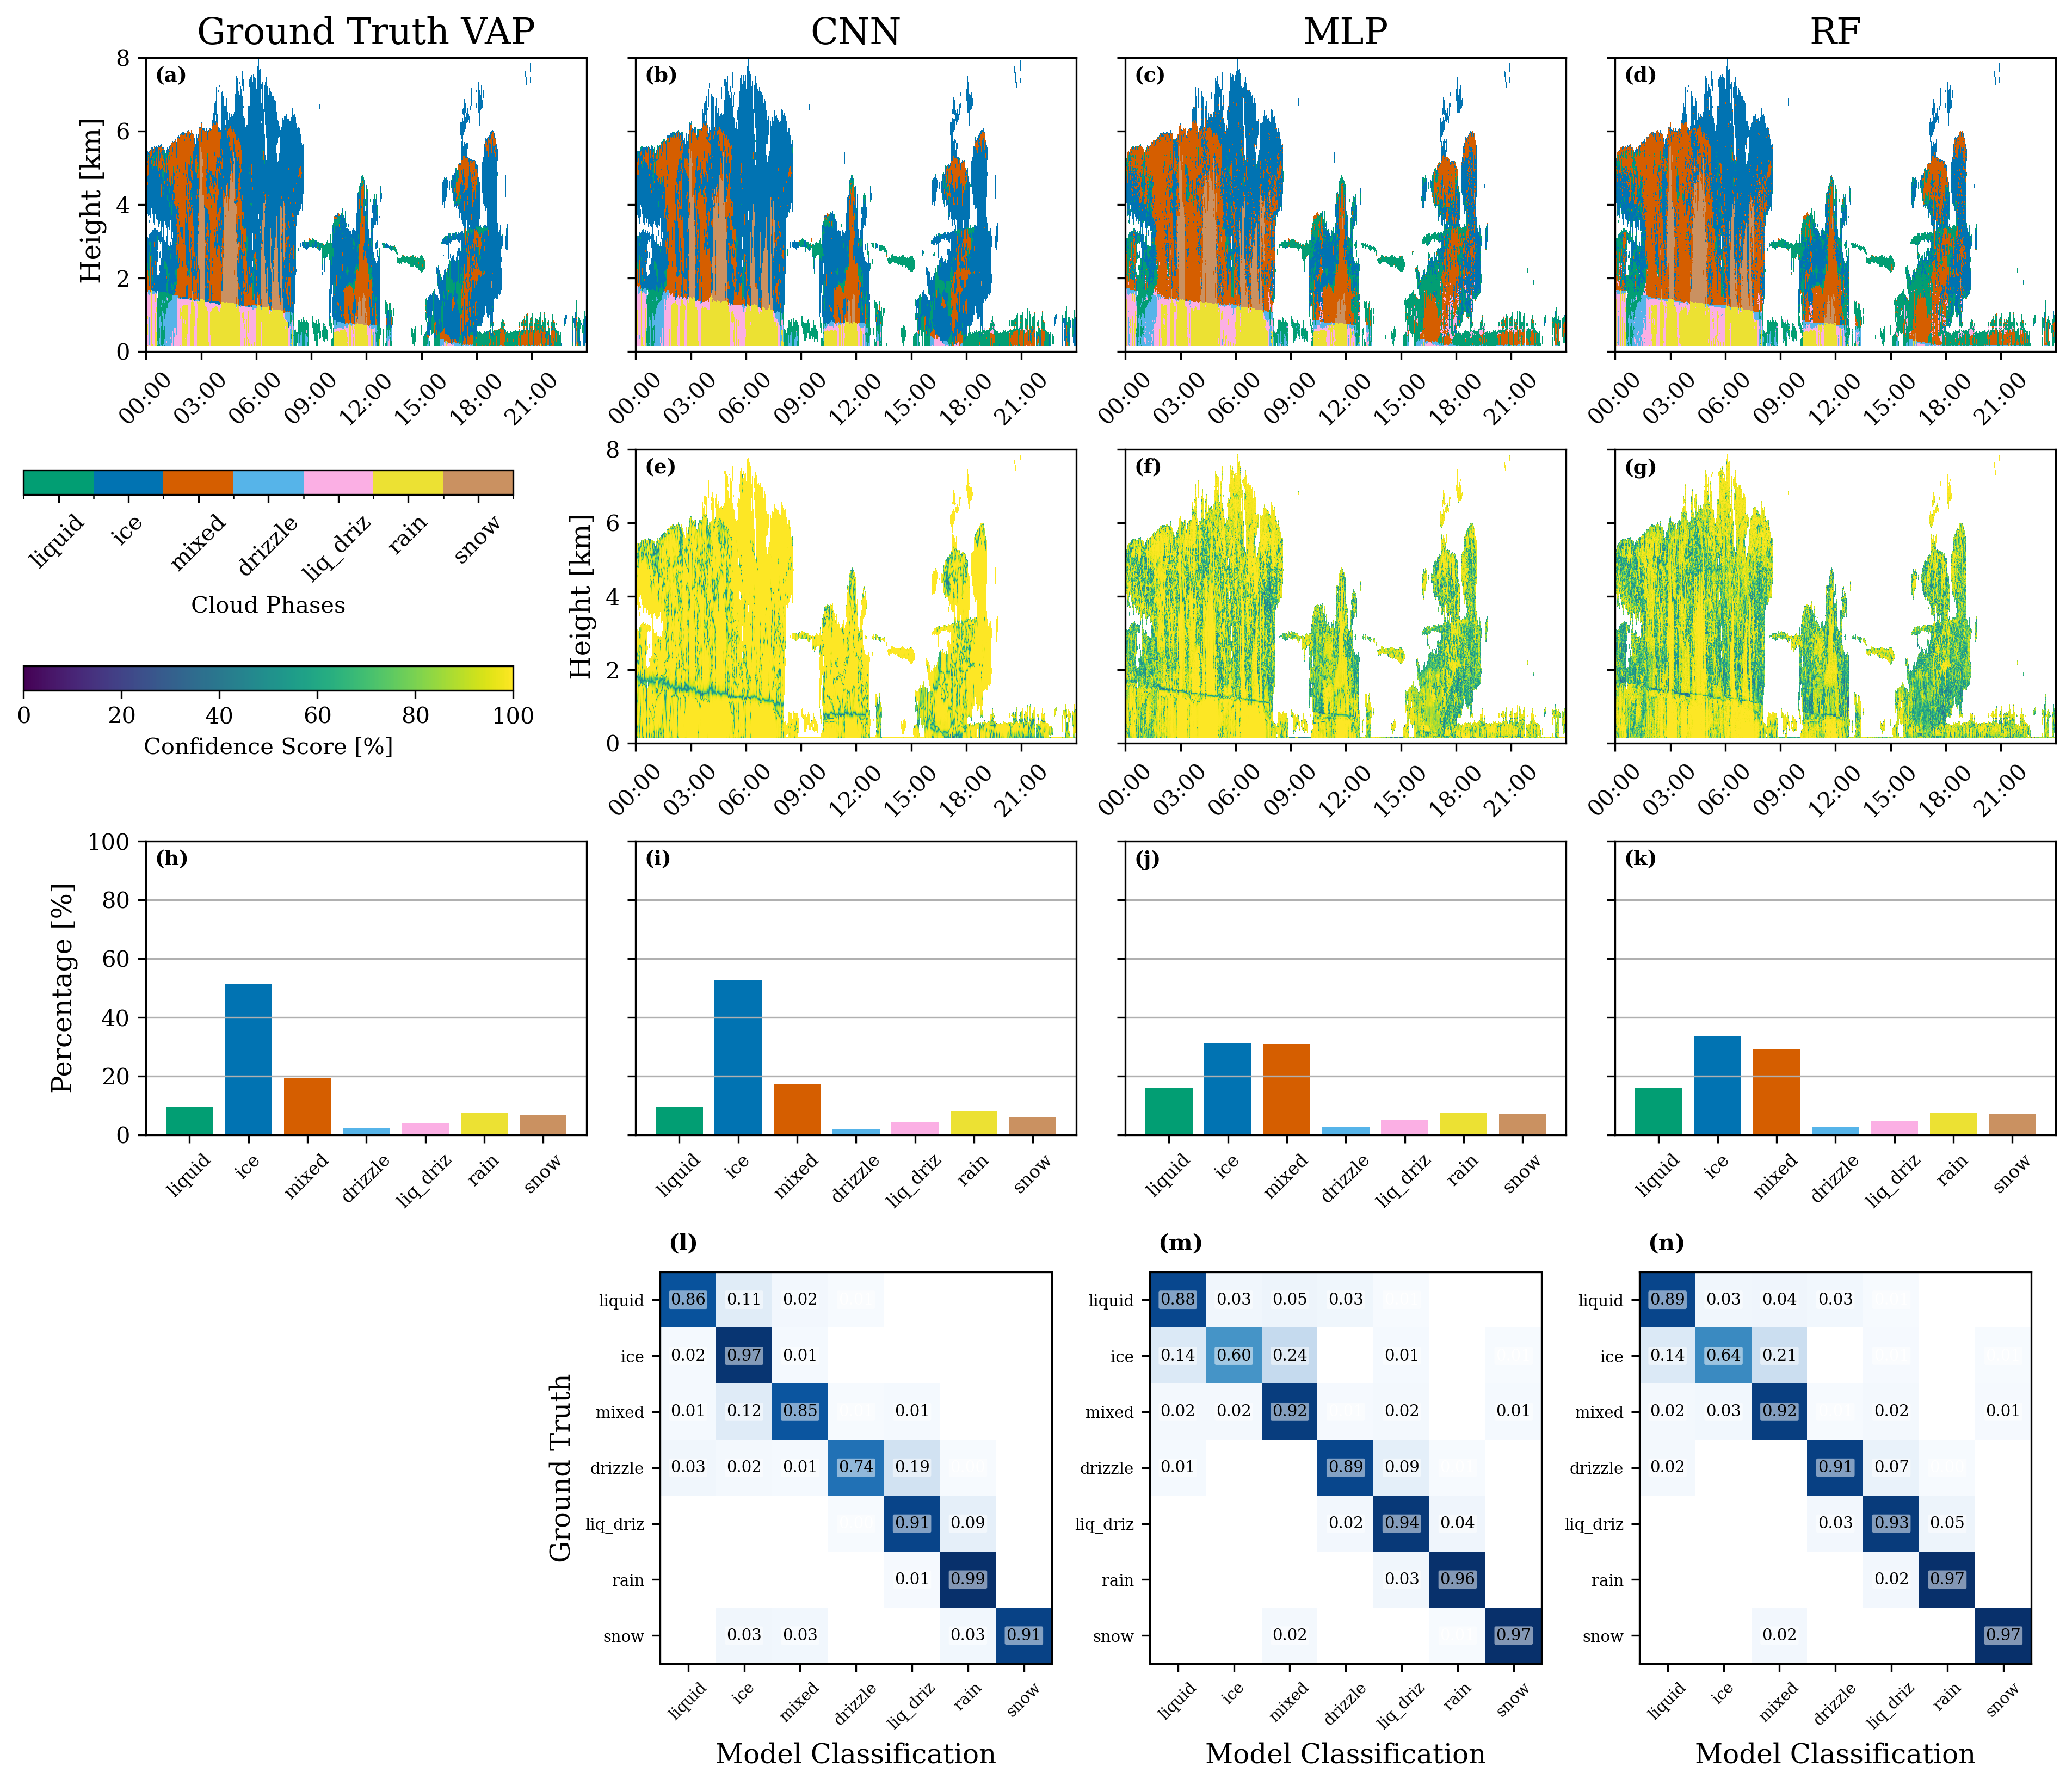

In [36]:

with plt.style.context("/home/goldberger/style.mplstyle"):
    # Create a figure
    fig = plt.figure(figsize=(15, 12))

    print('Case Study of Model Comparison \n ' + pd.to_datetime(ds.time[0].values).strftime('%B %d, %Y') + ', ARM Site ' + FILE_GLOB[0:3])

    # Create subplots
    axs = []
    for pos in positions:
        ax = fig.add_axes(pos)  # Create an axes at the specified position
        axs.append(ax)

    # Define letters to be added to each subplot
    letters = ['(a)', '(b)', '(c)', '(d)','','', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '','(l)', '(m)', '(n)','']


    # Colorbar
    create_small_colorbar(axs[4])
    axs[4].axis('off')
    create_confidence_colorbar(axs[17])#create_confidence_timeseries_colorbar('cnn_20240501_090456_confidence', axs[17], ds)
    axs[17].axis('off')
    # VAP Data
    create_timeseries_no_unknown('cloud_phase_mplgr',axs[0], ds, PHASE_MAP, custom_colors)
    create_histogram_no_unknown('cloud_phase_mplgr',axs[9], ds, PHASE_MAP, custom_colors); axs[9].set_ylabel('Percentage [%]');  axs[9].set_title('')
    axs[5].axis('off')
    axs[13].axis('off')
    # CNN
    create_timeseries_no_unknown('cnn',axs[1], ds, PHASE_MAP, custom_colors); axs[1].set_yticklabels([]);axs[1].set_ylabel('');
    create_histogram_no_unknown('cnn',axs[10], ds, PHASE_MAP, custom_colors); axs[10].set_yticklabels([]); axs[10].set_ylabel(''); axs[10].set_title('')
    create_confidence_timeseries('cnn_confidence', axs[6], ds); axs[6].set_title('')
    create_matrix('cnn',axs[14], ds, PHASE_MAP_small)
    # MLP
    create_timeseries_no_unknown('mlp_balanced',axs[2], ds, PHASE_MAP, custom_colors); axs[2].set_yticklabels([])
    create_histogram_no_unknown('mlp_balanced',axs[11], ds, PHASE_MAP, custom_colors); axs[11].set_yticklabels([]); axs[11].set_ylabel(''); axs[11].set_title('')
    create_confidence_timeseries('mlp_balanced_confidence', axs[7], ds); axs[7].set_yticklabels([]); axs[7].set_ylabel(''); axs[7].set_title('')
    create_matrix('mlp_balanced',axs[15], ds, PHASE_MAP_small);axs[15].set_ylabel('')
    # RF
    create_timeseries_no_unknown('rf_balanced',axs[3], ds, PHASE_MAP, custom_colors); axs[3].set_yticklabels([])
    create_histogram_no_unknown('rf_balanced',axs[12], ds, PHASE_MAP, custom_colors);axs[12].set_yticklabels([]); axs[12].set_ylabel(''); axs[12].set_title('')
    create_confidence_timeseries('rf_balanced_confidence', axs[8], ds); axs[8].set_yticklabels([]); axs[8].set_ylabel('');axs[8].set_title('')
    create_matrix('rf_balanced',axs[16], ds, PHASE_MAP_small); axs[16].set_ylabel('')

    # Add letter to top-left of each subplot
    for i, ax in enumerate(axs):
        if i < 13: 
            ax.text(
                x=0.02,  # Position near the left side of the subplot
                y=0.97,   # Position near the top of the subplot
                s=letters[i],  # Corresponding letter for each subplot
                transform=ax.transAxes,  # Coordinates are in axes-relative units
                verticalalignment="top",
                horizontalalignment="left",
                fontweight="bold",
                fontsize=9
            )
        else:
                ax.text(
                x= 0.02,  # Position near the left side of the subplot
                y=1.1,   # Position near the top of the subplot
                s=letters[i],  # Corresponding letter for each subplot
                transform=ax.transAxes,  # Coordinates are in axes-relative units
                verticalalignment="top",
                horizontalalignment="left",
                fontweight="bold",
                fontsize=10
            )

    fig.savefig('figure_3_revision1.png')   
    plt.show() 


### Figure 9

In [37]:
FILE_GLOB = "anxthermocldphaseM1.c1.20200225.000000.nc"

# Construct the full file path
file_path = BASE_PATH / FILE_GLOB

# Open the NetCDF file with xarray
ds = xr.open_dataset(file_path)

Case Study of Model Comparison 
 February 25, 2020, ARM Site anx
Accuracy=94.602%, Mean IoU=0.561
Accuracy=83.074%, Mean IoU=0.353
Accuracy=85.801%, Mean IoU=0.446


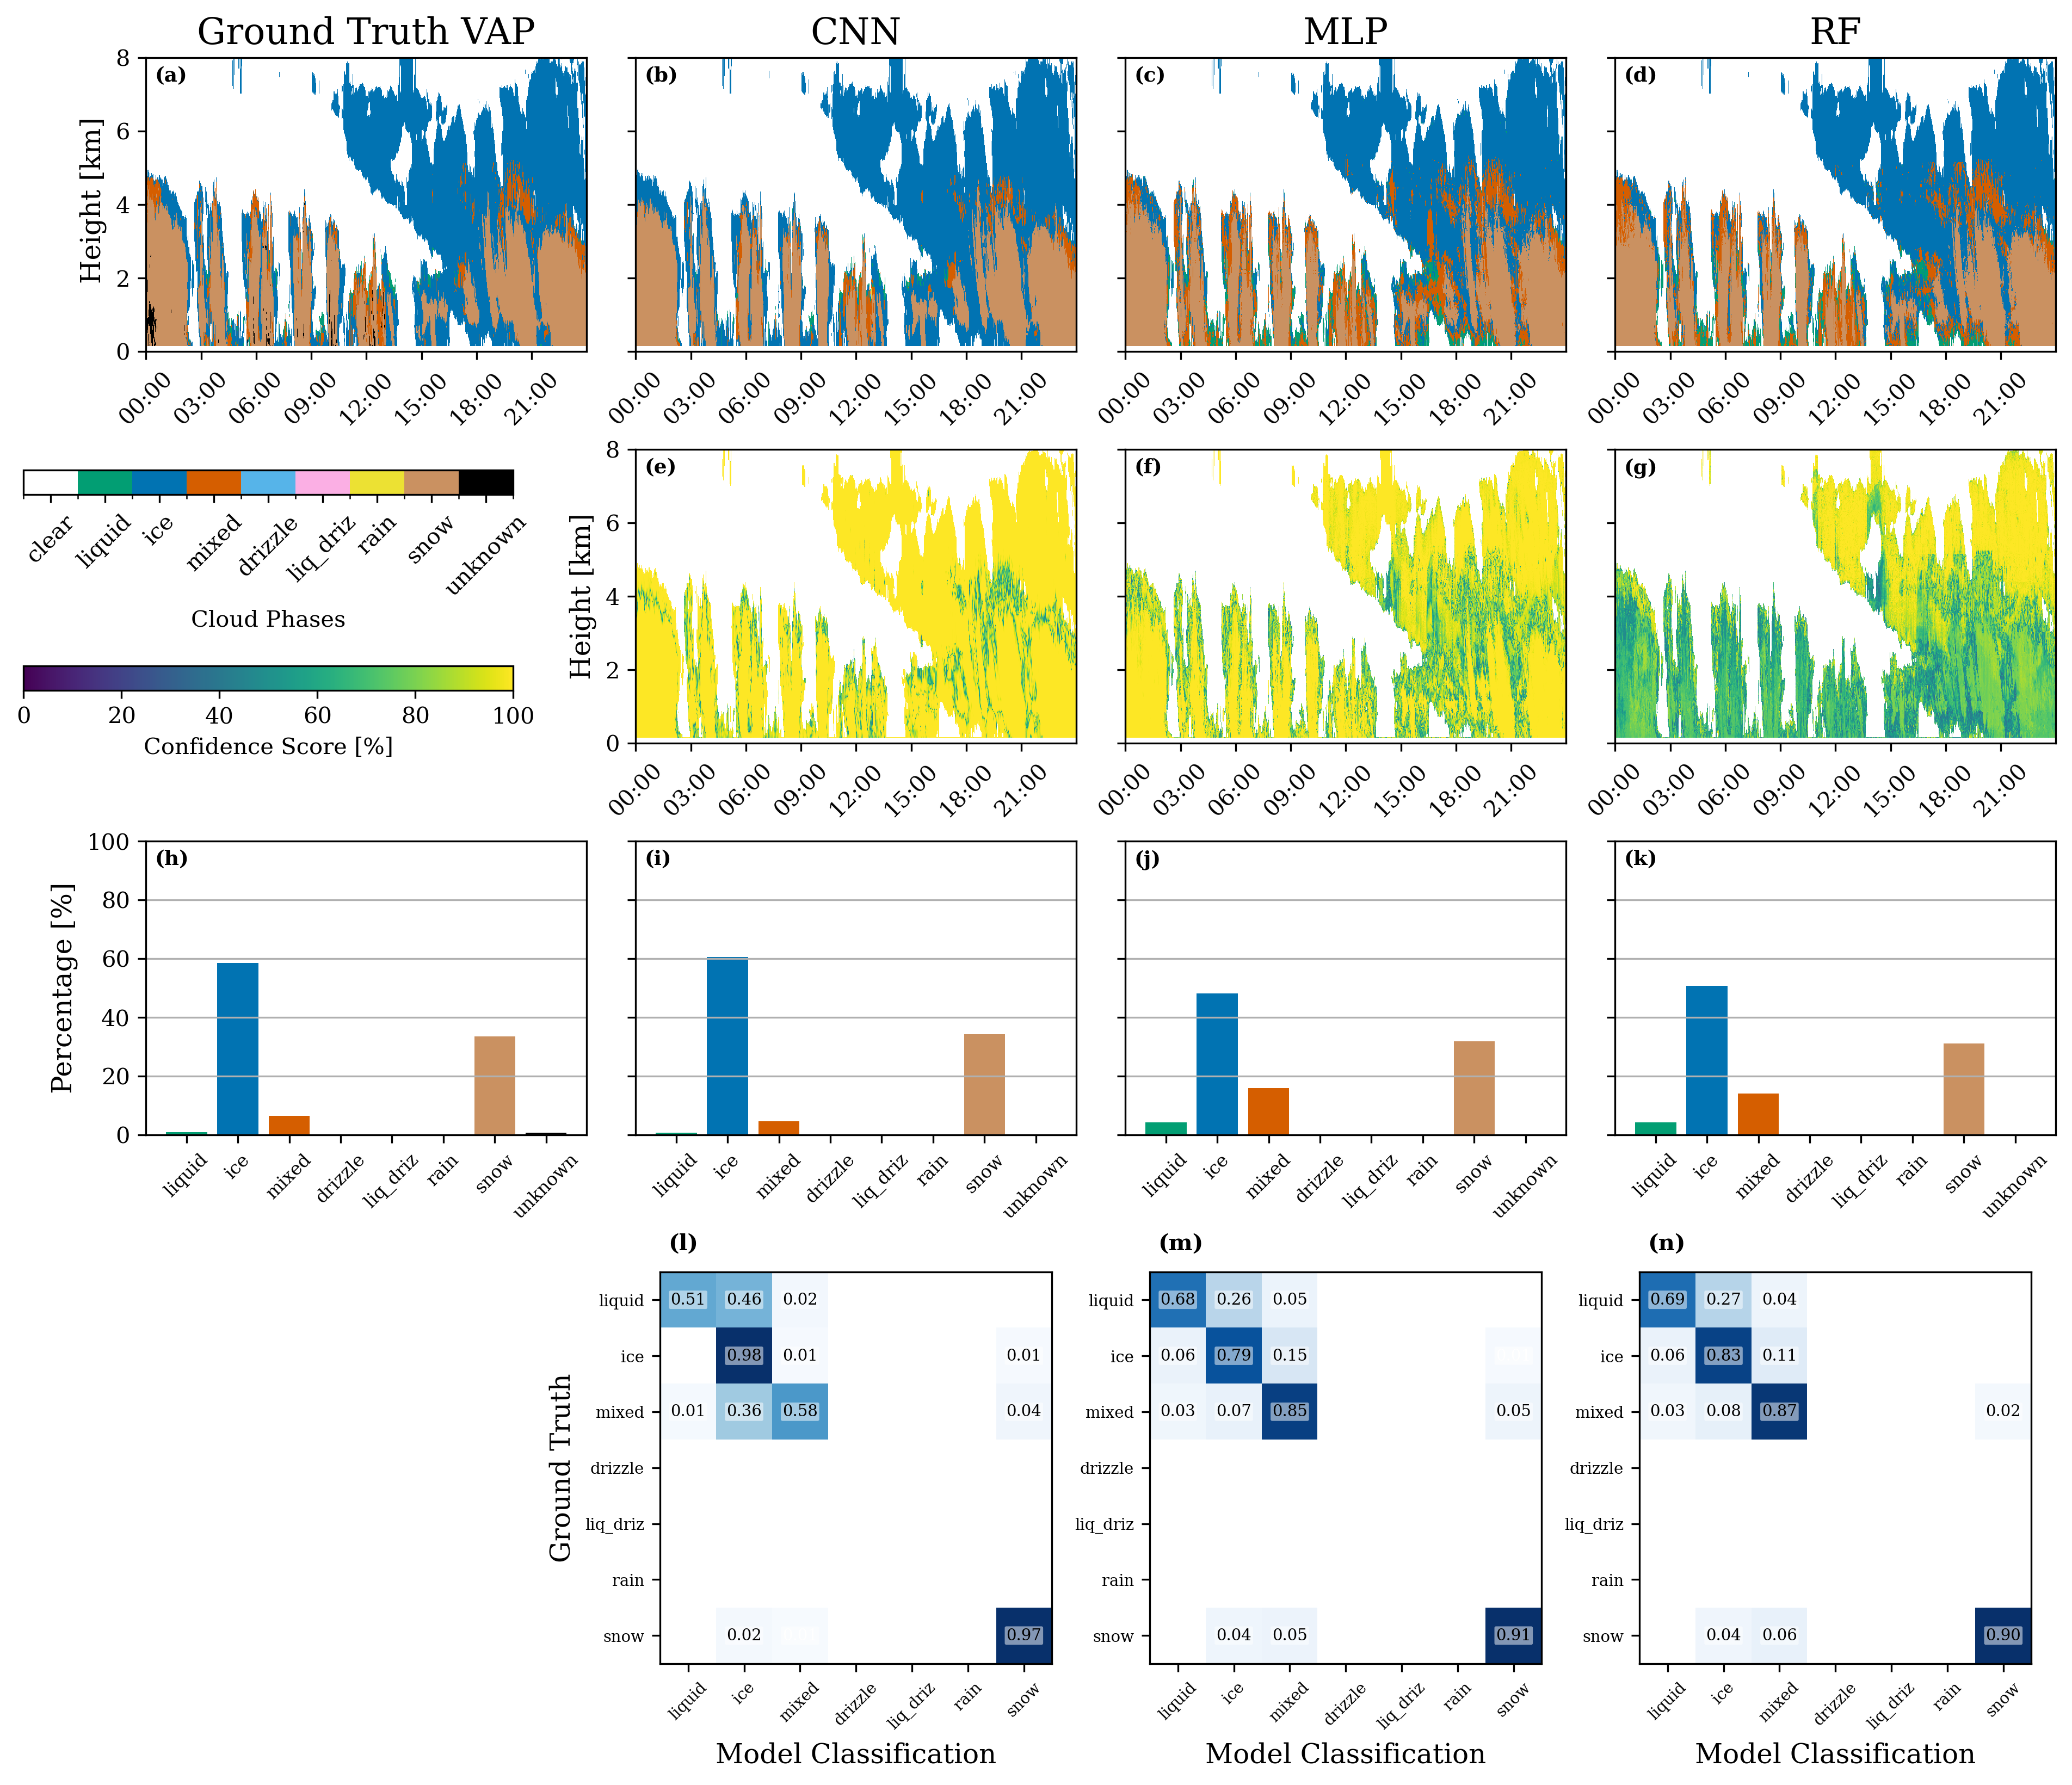

In [38]:

with plt.style.context("/home/goldberger/style.mplstyle"):
    # Create a figure
    fig = plt.figure(figsize=(15, 12))

    print('Case Study of Model Comparison \n ' + pd.to_datetime(ds.time[0].values).strftime('%B %d, %Y') + ', ARM Site ' + FILE_GLOB[0:3])

    # Create subplots
    axs = []
    for pos in positions:
        ax = fig.add_axes(pos)  # Create an axes at the specified position
        axs.append(ax)

    # Define letters to be added to each subplot
    letters = ['(a)', '(b)', '(c)', '(d)','','', '(e)', '(f)', '(g)', '(h)', '(i)', '(j)', '(k)', '','(l)', '(m)', '(n)','']


    # Colorbar
    create_colorbar(axs[4])
    axs[4].axis('off')
    create_confidence_colorbar(axs[17])#create_confidence_timeseries_colorbar('cnn_20240501_090456_confidence', axs[17], ds)
    axs[17].axis('off')
    # VAP Data
    create_timeseries('cloud_phase_mplgr',axs[0], ds, PHASE_MAP, custom_colors)
    create_histogram('cloud_phase_mplgr',axs[9], ds, PHASE_MAP, custom_colors); axs[9].set_ylabel('Percentage [%]');  axs[9].set_title('')
    axs[5].axis('off')
    axs[13].axis('off')
    # CNN
    create_timeseries_no_unknown('cnn',axs[1], ds, PHASE_MAP, custom_colors); axs[1].set_yticklabels([]);axs[1].set_ylabel('')
    create_histogram('cnn',axs[10], ds, PHASE_MAP, custom_colors); axs[10].set_yticklabels([]); axs[10].set_ylabel(''); axs[10].set_title('')
    create_confidence_timeseries('cnn_confidence', axs[6], ds); axs[6].set_title('')
    create_matrix('cnn',axs[14], ds, PHASE_MAP_small)
    # MLP
    create_timeseries_no_unknown('mlp_balanced',axs[2], ds, PHASE_MAP, custom_colors); axs[2].set_yticklabels([])
    create_histogram('mlp_balanced',axs[11], ds, PHASE_MAP, custom_colors); axs[11].set_yticklabels([]); axs[11].set_ylabel(''); axs[11].set_title('')
    create_confidence_timeseries('mlp_balanced_confidence', axs[7], ds); axs[7].set_yticklabels([]); axs[7].set_ylabel(''); axs[7].set_title('')
    create_matrix('mlp_balanced',axs[15], ds, PHASE_MAP_small);axs[15].set_ylabel('')
    # RF
    create_timeseries_no_unknown('rf_balanced',axs[3], ds, PHASE_MAP, custom_colors); axs[3].set_yticklabels([])
    create_histogram('rf_balanced',axs[12], ds, PHASE_MAP, custom_colors);axs[12].set_yticklabels([]); axs[12].set_ylabel(''); axs[12].set_title('')
    create_confidence_timeseries('rf_balanced_confidence', axs[8], ds); axs[8].set_yticklabels([]); axs[8].set_ylabel('');axs[8].set_title('')
    create_matrix('rf_balanced',axs[16], ds, PHASE_MAP_small); axs[16].set_ylabel('')

    # Add letter to top-left of each subplot
    for i, ax in enumerate(axs):
        if i < 13: 
            ax.text(
                x=0.02,  # Position near the left side of the subplot
                y=0.97,   # Position near the top of the subplot
                s=letters[i],  # Corresponding letter for each subplot
                transform=ax.transAxes,  # Coordinates are in axes-relative units
                verticalalignment="top",
                horizontalalignment="left",
                fontweight="bold",
                fontsize=9
            )
        else:
                ax.text(
                x= 0.02,  # Position near the left side of the subplot
                y=1.1,   # Position near the top of the subplot
                s=letters[i],  # Corresponding letter for each subplot
                transform=ax.transAxes,  # Coordinates are in axes-relative units
                verticalalignment="top",
                horizontalalignment="left",
                fontweight="bold",
                fontsize=10
            )

    fig.savefig('figure_7_revision1.png')   
    plt.show() 


In [39]:
ds

<xarray.Dataset>
Dimensions:                            (time: 2880, bound: 2, height: 384,
                                        layer: 10, phase: 8)
Coordinates:
  * time                               (time) datetime64[ns] 2020-02-25 ... 2...
  * height                             (height) float32 0.16 0.19 ... 11.65
  * layer                              (layer) int32 0 1 2 3 4 5 6 7 8 9
Dimensions without coordinates: bound, phase
Data variables: (12/110)
    base_time                          (time) datetime64[ns] ...
    time_offset                        (time) datetime64[ns] ...
    time_bounds                        (time, bound) datetime64[ns] ...
    cloud_flag                         (time, height) float64 ...
    cloud_phase_mplgr                  (time, height) float64 0.0 0.0 ... 0.0
    qc_cloud_phase_mplgr               (time, height) int32 ...
    ...                                 ...
    cnn_dropout_rad                    (time, height) float64 ...
    cnn_rad                            (time, height) float64 ...
    rf_balanced_rad                    (time, height) float64 ...
    rf_imbalanced_rad                  (time, height) float64 ...
    mlp_balanced_rad                   (time, height) float64 ...
    mlp_imbalanced_rad                 (time, height) float64 ...
Attributes: (12/49)
    command_line:                                   thermocldphase -s anx -f ...
    Conventions:                                    ARM-1.3
    process_version:                                vap-thermocldphase-0.3-0....
    dod_version:                                    thermocldphase-c1-2.2
    input_datastreams:                              anx30smplcmask1zwangM1.c1...
    site_id:                                        anx
    ...                                             ...
    mpl_depol_ratio_threshold_comment:              ARM micropulse lidar depo...
    top_backscatter_grad_threshold:                 10.0
    top_backscatter_grad_threshold_comment:         Threshold of backscatter ...
    base_backscatter_grad_threshold:                1.0
    base_backscatter_grad_threshold_comment:        Threshold of backscatter ...
    history:                                        created by user levin on ...